In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import time

import Featurizer as ft

warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
pd.set_option('display.max_columns', 50)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [14]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [12.0,8.0]

In [15]:
import category_encoders as ce

OHE = ce.OneHotEncoder( handle_unknown='ignore', use_cat_names=True)
BE = ce.BinaryEncoder( handle_unknown='ignore')
HE = ce.HashingEncoder( )
TE1 = ce.TargetEncoder( handle_unknown='ignore')
TE2 = ce.TargetEncoder( handle_unknown='ignore')
TE3 = ce.TargetEncoder( handle_unknown='ignore')
TE4 = ce.TargetEncoder( handle_unknown='ignore')

In [16]:
df_train = pd.read_csv("../data/palabras.csv")

df_feature_descripcion = pd.read_csv("../data/word-features-reduced.csv", dtype=np.float16)

df_train = df_train.join(df_feature_descripcion)

## Pre-processing

In [18]:
X = df_train.drop("precio", axis=1)
y = df_train['precio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [19]:
X_train_submit = X_train.copy()

In [20]:
X_train[ ft.getTarget1Cols() ] = X_train[ft.getAllCols()]
X_test[ ft.getTarget1Cols() ] = X_test[ft.getAllCols()]

X_train[ ft.getTarget2Cols() ] = X_train[ft.getAllCols()]
X_test[ ft.getTarget2Cols() ] = X_test[ft.getAllCols()]

X_train[ ft.getTarget3Cols() ] = X_train[ft.getAllCols()+['habitaciones','ambientes']]
X_test[ ft.getTarget3Cols() ] = X_test[ft.getAllCols()+['habitaciones','ambientes']]

X_train[ ft.getTarget4Cols() ] = X_train[ft.getAllCols()+['habitaciones','ambientes']]
X_test[ ft.getTarget4Cols() ] = X_test[ft.getAllCols()+['habitaciones','ambientes']]

In [21]:
X_train_ant = X_train["antiguedad"]
X_test_ant = X_test["antiguedad"]

In [22]:
X_train = ft.preprocess(X_train, OHE, BE, 'train', TE1, TE2, TE3, TE4, y_train, X_train_ant)
X_test = ft.preprocess(X_test, OHE, BE, 'test', TE1, TE2, TE3, TE4)

--- 10.406573295593262 seconds ---
--- 1.669173002243042 seconds ---


In [23]:
X_train["banoshabit"] = X_train["banos"]/X_train["habitaciones"]
X_test["banoshabit"] = X_test["banos"]/X_test["habitaciones"]

In [24]:
print(f"Original shapes: X={X.shape} y={y.shape}")
print(f"Train shapes: X={X_train.shape} y={y_train.shape}")
print(f"Test  shapes: X={X_test.shape}  y=-{y_test.shape}")

Original shapes: X=(240000, 145) y=(240000,)
Train shapes: X=(180000, 235) y=(180000,)
Test  shapes: X=(60000, 235)  y=-(60000,)


In [32]:
df_train

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,anio,mes,dia,palabra_hermosa,...,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,ambientes
0,254099,depto tipo,depto interior consta sala comedor cocina equi...,Apartamento,avenida division norte,Benito Juárez,Distrito Federal,NaN,2.0,1.0,2.0,80.0,80.0,23533.0,2015-08-23,0.0,0.0,0.0,0.0,0.0,2273000.0,2015,8,23,0,...,2.0,5.0,1.0,1.0,3.0,2.0,0.0,3.0,4.0,3.0,1.0,4.0,2.0,2.0,2.0,1.0,1.0,4.0,0.0,2.0,1.0,1.0,2.0,4.0,4.0
1,53461,condominio horizontal venta,sonora guerrero atr s hospital ngeles pedregal...,Casa en condominio,av mexico,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,2.0,268.0,180.0,24514.0,2013-06-28,0.0,0.0,0.0,1.0,1.0,3600000.0,2013,6,28,0,...,4.0,1.0,2.0,4.0,1.0,2.0,0.0,0.0,2.0,2.0,4.0,3.0,2.0,3.0,5.0,2.0,5.0,1.0,2.0,3.0,6.0,2.0,4.0,4.0,5.0
2,247984,casa venta urbi recamaras tonala,descripcion mejor ubicacion residencial orient...,Casa,urbi tonala,Tonalá,Jalisco,5.0,3.0,2.0,2.0,144.0,166.0,48551.0,2015-10-17,0.0,0.0,0.0,0.0,0.0,1200000.0,2015,10,17,1,...,3.0,4.0,6.0,6.0,0.0,1.0,3.0,3.0,2.0,1.0,4.0,3.0,1.0,2.0,1.0,4.0,3.0,2.0,1.0,1.0,3.0,4.0,4.0,1.0,5.0
3,209067,casa sola toluca zinacantepec credito infonavi...,casa privada caseta vigilancia casas dos tres ...,Casa,ignacio manuel altamirano,Zinacantepec,Edo. de México,1.0,2.0,1.0,1.0,63.0,67.0,53666.0,2012-03-09,0.0,0.0,0.0,1.0,1.0,650000.0,2012,3,9,0,...,2.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,0.0,1.0,2.0,6.0,3.0,2.0,0.0,2.0,3.0,5.0,3.0,3.0,1.0,3.0,3.0,4.0,3.0
4,185997,paseos sol,bonito departamento excelentes condiciones bue...,Apartamento,paseos sol,Zapopan,Jalisco,10.0,2.0,1.0,1.0,95.0,95.0,47835.0,2016-06-07,0.0,0.0,0.0,0.0,0.0,1150000.0,2016,6,7,1,...,0.0,1.0,3.0,2.0,0.0,1.0,4.0,3.0,1.0,4.0,1.0,4.0,2.0,3.0,3.0,3.0,5.0,2.0,3.0,2.0,1.0,6.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,119879,bonita casas recamaras minutos centro toluca,vendo casa bosques ica residencial minutos cen...,Casa,bosques,Zinacantepec,Edo. de México,0.0,2.0,2.0,1.0,67.0,NaN,53666.0,2015-02-08,0.0,0.0,0.0,0.0,0.0,650000.0,2015,2,8,1,...,1.0,4.0,1.0,4.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,4.0,6.0,2.0,1.0,5.0,2.0,2.0,1.0,3.0,1.0,0.0,3.0
239996,259178,casa condominio min centro toluca,casa jardin amplio cuarto servicio baño comple...,Casa,filiberto navas,Toluca,Edo. de México,0.0,3.0,3.0,3.0,200.0,250.0,51954.0,2014-07-10,0.0,0.0,0.0,1.0,1.0,1940000.0,2014,7,10,0,...,2.0,1.0,2.0,1.0,2.0,2.0,0.0,3.0,6.0,5.0,0.0,4.0,1.0,0.0,2.0,3.0,2.0,2.0,6.0,4.0,3.0,3.0,1.0,1.0,6.0
239997,131932,nicolas san juan,departamento excelente ubicacion cerca av univ...,Apartamento,nicolas san juan,Benito Juárez,Distrito Federal,20.0,2.0,1.0,2.0,138.0,138.0,50003995.0,2015-03-03,0.0,0.0,0.0,0.0,0.0,3400000.0,2015,3,3,0,...,2.0,4.0,4.0,1.0,0.0,3.0,4.0,1.0,0.0,3.0,2.0,5.0,6.0,8.0,1.0,3.0,3.0,0.0,6.0,1.0,2.0,4.0,1.0,4.0,4.0
239998,146867,casa sola javier rojo gomez,casa sola dividida cuatro departamentos recama...,Casa,javier rojo gomez,Iztapalapa,Distrito Federal,20.0,4.0,0.0,4.0,235.0,137.0,24162.0,2014-12-26,1.0,0.0,0.0,1.0,1.0,2890000.0,2014,12,26,0,...,1.0,4.0,1.0,3.0,5.0,2.0,0.0,6.0,2.0,2.0,5.0,3.0,4.0,3.0,5.0,5.0,3.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,8.0


## Training

In [26]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=1750,n_jobs=6,objective="reg:squarederror", max_depth= 11,min_child_weight = 1,colsample_bytree=0.5, gamma=1, learning_rate=0.1, subsample=1,)
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=1,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=11, min_child_weight=1, missing=None, n_estimators=1750,
             n_jobs=6, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [27]:
start_time = time.time()
model.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 1682.7245471477509 seconds ---


## Predicciones

In [28]:
ft.predecir(model, X_train, y_train, X_test, y_test)

Entrenamiento: 99.9727%
Testeo: 83.4689%.
Mean abs error: 497556.9132.


In [29]:
plt.rcParams["figure.figsize"] = [15, 15]

importancia = model.feature_importances_

d = {'x':X_train.columns,'y':importancia}

df_importancia = pd.DataFrame(d)

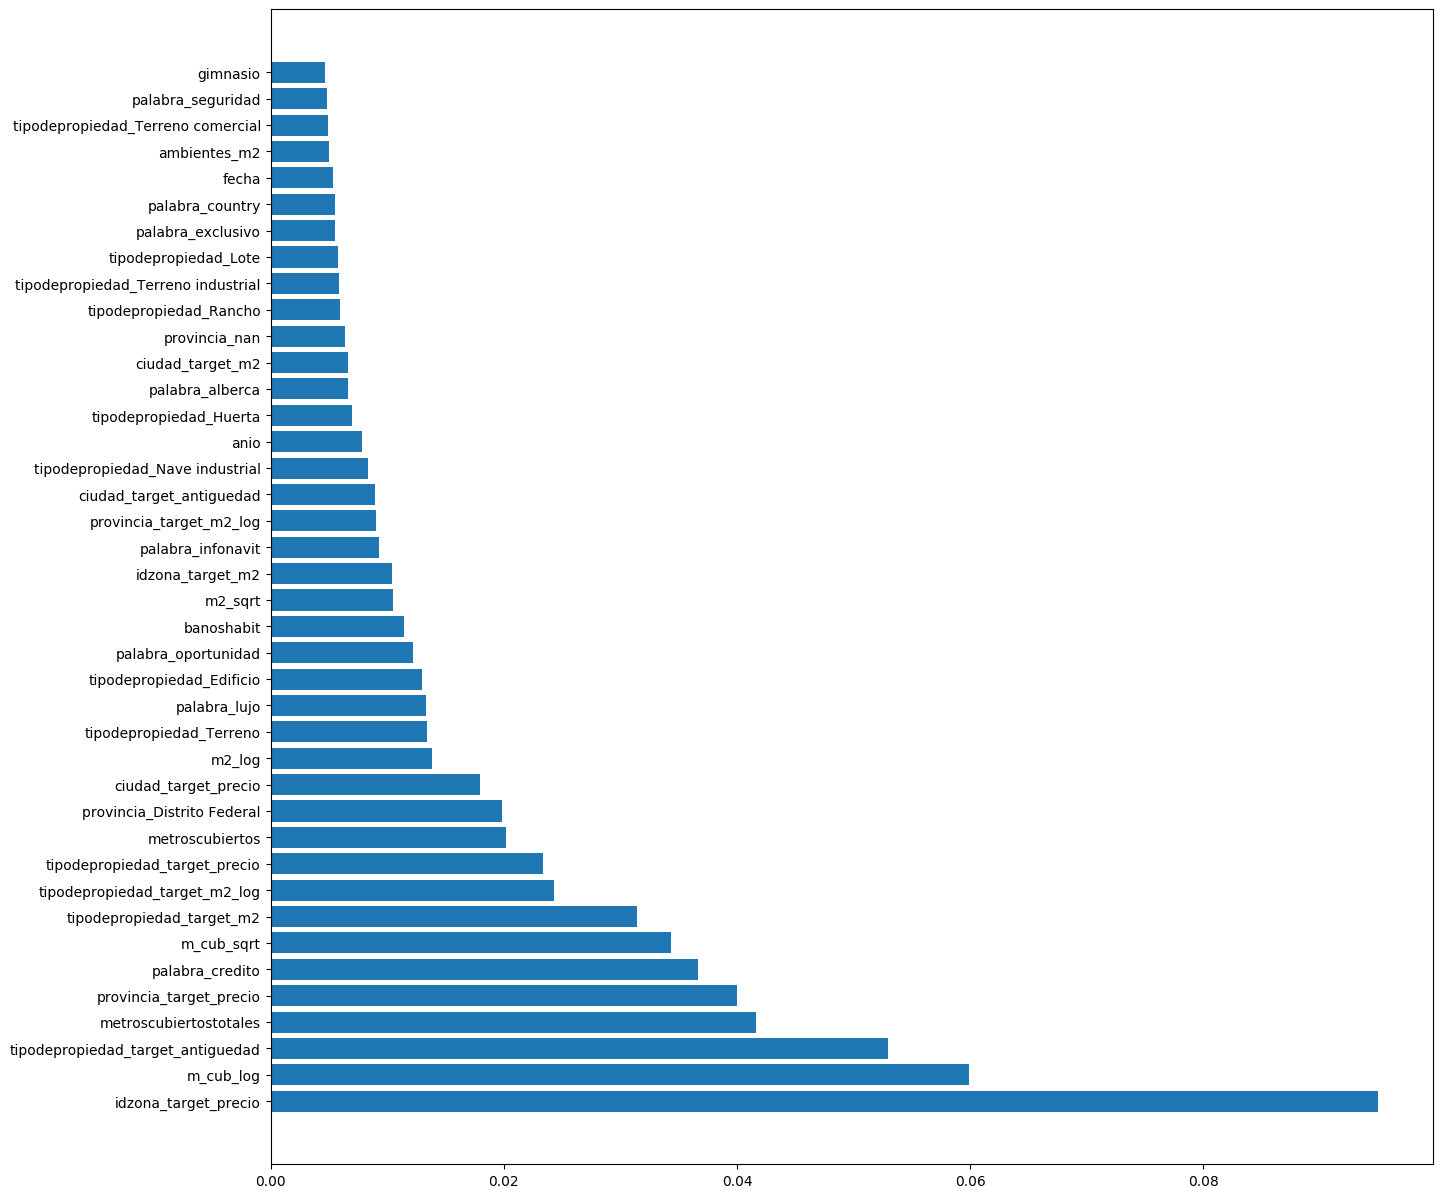

In [30]:
importancia = df_importancia.sort_values(by="y",ascending=False).head(40)
ax = plt.barh(importancia.x,importancia.y)

## Submission

In [28]:
df_test = pd.read_csv('../data/test.csv')

In [29]:
df = df_test.copy()
df = ft.init_test(df)

In [30]:
df[ ft.getTarget1Cols() ] = df[ft.getAllCols()]
df[ ft.getTarget2Cols() ] = df[ft.getAllCols()]
df[ ft.getTarget3Cols() ] = df[ft.getAllCols()+['habitaciones','ambientes']]

In [31]:
df = ft.preprocess(df, OHE, BE, 'test', TE1, TE2, TE3, TE4)

--- 1.3208162784576416 seconds ---


In [32]:
df["banoshabit"] = df["banos"]/df["habitaciones"]

In [33]:
#df, X_train = df.align(X_train,axis=1)


In [34]:
submit_prediction = model.predict( df )

In [35]:
#cols_diff = []
#t = X_train_submit.columns.values
#fs = df.columns.values
#i = 0
#for feat in t:
#    if feat != fs[i]:
#        cols_diff.append(feat)
#    i=+1
#display(cols_diff)        

In [ ]:
#pd.concat([df_test[['id']], pd.Series(submit_prediction)], axis=1).rename(columns={0:"target"}).to_csv("../data/submission13.csv", index=False)

In [36]:
from submission_helper import submission_output

output = submission_output(df_test, submit_prediction)

nombre_submit = 'submission28.csv'

output.to_csv('../data/'+nombre_submit, index=False)